In [84]:
#!pip install seaborn
#!pip install scikit-learn
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 435.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.3 MB 762.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.2/1.3 MB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 1.1 MB/s eta 0:00:01
   -------------- ----

In [93]:
import ee
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize()

In [19]:
SO2 = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_SO2")#sulphur dioxide
CO = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_CO")#Carbon Monoxide
NO2 = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")#Nitrogen Dioxide
HCHO = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_HCHO")#Formaldehyde
AI = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_AER_AI")#UVAerosol Index
O3 = ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_O3")#Ozone 3
CLOUD = ee.ImageCollection("COPERNICUS/S5P/OFFL/L3_CLOUD")#Cloud

In [20]:
# Select the first image from the collection
image = O3.first()

# Get the band names
band_names = image.bandNames().getInfo()

# Print the band names
print("Band names:", band_names)

Band names: ['O3_column_number_density', 'O3_column_number_density_amf', 'O3_slant_column_number_density', 'O3_effective_temperature', 'cloud_fraction', 'sensor_azimuth_angle', 'sensor_zenith_angle', 'solar_azimuth_angle', 'solar_zenith_angle']


In [14]:
import geemap
Map = geemap.Map()
collection = s02.select('SO2_column_number_density').filterDate('2019-06-01', '2019-06-11');
band_viz = {
  min: 0.0,
  max: 0.0005,
  'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

Map.addLayer(collection.mean(), band_viz, 'S5P SO2')
Map.setCenter(0.0, 0.0, 2)

In [15]:
Map

Map(center=[0.0, 0.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [60]:
from pathlib import Path
#Load our  data
data_path = Path('C:/Users/Lucy Kimani/lucy/Projects/my_projects/Zindi/Air Quality')


In [61]:

train_data = pd.read_csv(data_path / 'Train.csv')
test_data = pd.read_csv(data_path / 'Test.csv')
submission_data = pd.read_csv(data_path / 'SampleSubmission.csv')



In [46]:
train_data.describe()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
count,8071.000000,8071.000000,8071.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,...,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,8071.000000
mean,0.635678,30.246982,10.877463,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028,24.639296
std,2.154605,9.393151,0.815875,0.000354,0.142544,0.000220,0.094129,85.450554,18.964322,43.240479,...,2991.879500,18974.281900,2971.949265,27.547282,0.046204,85.873938,14.721454,40.627170,7.038309,24.878920
min,-3.459970,3.201510,10.000000,-0.000980,0.299364,-0.000696,0.000000,-107.710861,0.177093,-165.131509,...,521.378113,10752.090499,9.741494,1.458444,0.090547,-102.706078,2.996863,-159.058782,10.314990,1.200000
25%,0.288630,32.568643,10.000000,-0.000196,0.589849,-0.000137,0.038062,-98.911720,22.811537,-134.823883,...,3687.102253,43231.418685,2701.118575,5.612198,0.228117,-98.865659,37.901279,-125.371559,24.102775,13.270600
50%,0.332610,32.600480,11.000000,0.000012,0.669632,0.000007,0.123876,71.653160,42.564364,-95.848477,...,5389.787844,60432.792969,4389.787844,8.752905,0.257323,-97.477511,49.187592,-74.597511,29.002745,18.375400
75%,0.374653,32.641110,11.000000,0.000221,0.766817,0.000149,0.209070,74.110476,54.238408,-49.662067,...,8047.738159,74276.492371,7047.738159,14.794590,0.285948,72.814735,57.156175,-49.902340,33.929767,28.838400
max,6.595400,36.914272,14.000000,0.002024,1.607052,0.001101,0.299850,77.319656,66.234924,-22.250822,...,17287.677734,100909.219778,16287.677734,250.000002,0.417945,77.319656,66.238778,-22.251009,45.496395,456.193333


In [47]:
train_data.columns

Index(['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country',
       'date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_densi

In [32]:
# Preview the first five rows of the train set
train_data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [48]:
test_data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-06,13,-0.000072,0.762543,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-07,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-08,13,-0.000051,1.004265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_ioese5awdg,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-09,12,NaN,NaN,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
4,id_hdw320zpls,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-20,12,-0.000634,0.632173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
submission_data.head()

,id,pm2_5
0,id_ihxgrbq8bw,0
1,id_dg6s4fhiwe,0
2,id_f7hwwtmuzp,0
3,id_ioese5awdg,0
4,id_hdw320zpls,0


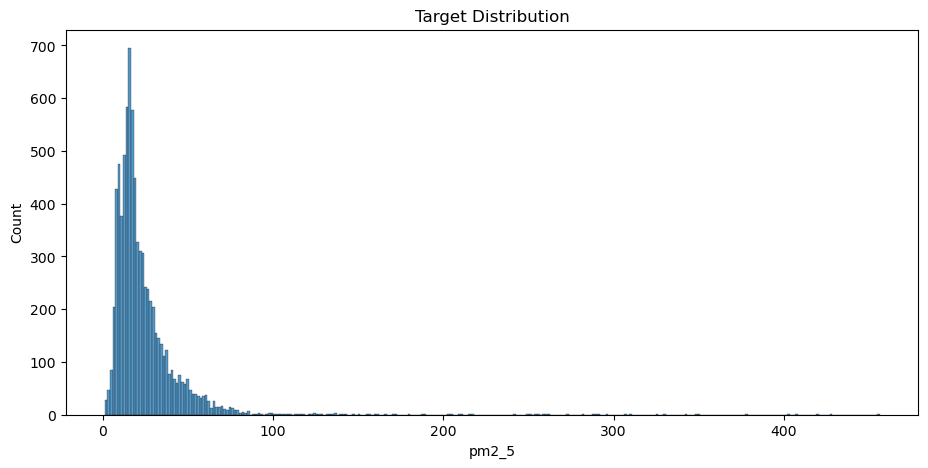

In [65]:
# variable that the model is trying to predict.
# target distribution
plt.figure(figsize = (11, 5))
sns.histplot(train_data.pm2_5)
plt.title('Target Distribution')
plt.show()

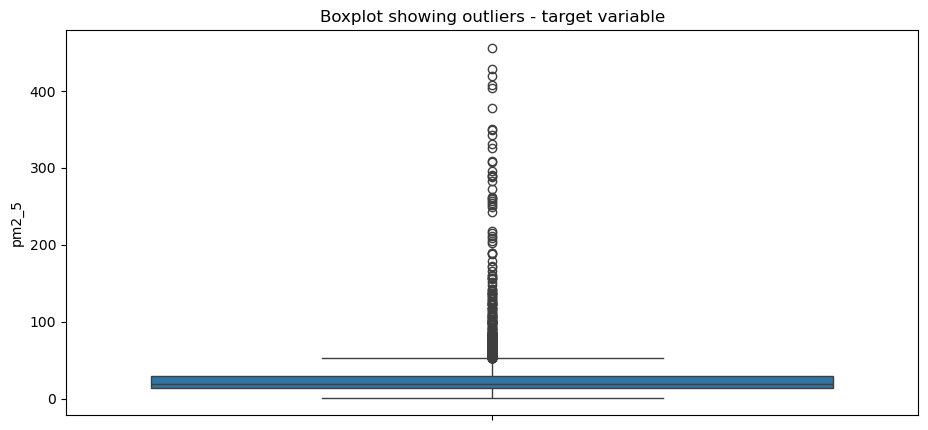

In [67]:
# Check for outliers in the target variable
plt.figure(figsize = (11, 5))
sns.boxplot(train_data.pm2_5)
plt.title('Boxplot showing outliers - target variable')
plt.show()

 code selects only the numerical features from the train_data dataset and then computes the top 10 absolute correlations between these numerical features and the target variable pm2_5. It then visualizes the correlation matrix using a heatmap with Seaborn.

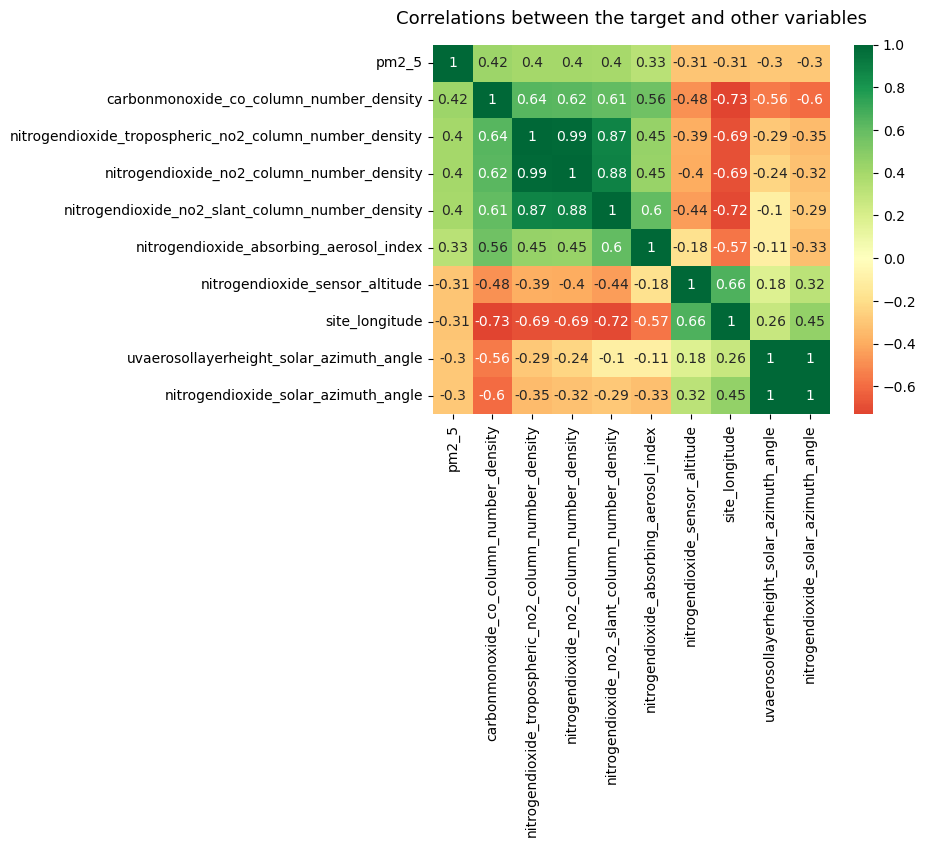

In [72]:
# Select only numerical features
train_num_df = train_data.select_dtypes(include=['number'])#selects only the numerical features 
#calculate the absolute correlations between each numerical feature and the target variable pm2_5
top10_corrs = abs(train_num_df.corr()['pm2_5']).sort_values(ascending = False).head(10)#selects the top 10 features with the highest absolute correlations.
corr = train_num_df[list(top10_corrs.index)].corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlations between the target and other variables', pad = 15, fontdict={'size': 13})
plt.show()

In [81]:
# Select X and y features for modelling
X = train_num_df.drop('pm2_5', axis = 1)
y = train_data.pm2_5#y now contains the target values that the model will try to predict.

test_df = test_data[X.columns]#. It ensures that the test dataset has the same features as the training dataset
test_df.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,5.61252,-0.22955,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,5.61252,-0.22955,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.61252,-0.22955,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.61252,-0.22955,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
4,5.61252,-0.22955,12,-0.000634,0.632173,-0.000401,0.000000,70.066956,66.014107,-111.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

model = LGBMRegressor()
model.fit(X_train, y_train)

# Local score
y_pred = model.predict(X_test)

score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16874
[LightGBM] [Info] Number of data points in the train set: 5649, number of used features: 74
[LightGBM] [Info] Start training from score 24.568926
Local RMSE: 17.14118587767826


In [91]:
# Make predictions on the test set
preds = model.predict(test_df)

# Create submission file
sub = pd.DataFrame({'id': test_data['id'], 'pm2_5': preds})

# Preview sub file
sub.head()

,id,pm2_5
0,id_ihxgrbq8bw,17.970660
1,id_dg6s4fhiwe,23.608020
2,id_f7hwwtmuzp,16.248447
3,id_ioese5awdg,25.870311
4,id_hdw320zpls,23.156237


In [92]:
# Create a csv file
sub.to_csv('submission_1.csv', index = False)

In [94]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE
score = mean_squared_error(y_test, y_pred, squared=False)
print('Local RMSE:', score)


Local RMSE: 21.633476146606405
